In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import os

# Analises dos filmes participantes dos Oscar
### Usando apenas dados dos filmes que foram indicados ao Oscar, analisando os que foram premiados ou não

In [3]:
caminho_arquivo_csv = os.path.join(os.path.dirname('03 - Projeto'), '..', '..', 'datasets')
df = pd.read_csv( os.path.join(caminho_arquivo_csv, 'filmes_total.csv'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_ceremony          2220 non-null   int64  
 1   category               2220 non-null   object 
 2   name                   2220 non-null   object 
 3   film                   2220 non-null   object 
 4   winner                 2220 non-null   bool   
 5   Movie Name             2220 non-null   object 
 6   Year of Release        2220 non-null   int64  
 7   Gross                  1903 non-null   float64
 8   Genre                  2220 non-null   object 
 9   Stars                  2220 non-null   object 
 10  media_idade            2217 non-null   float64
 11  qtd_atores             2220 non-null   float64
 12  qtd_atores_etnia       2220 non-null   float64
 13  qtd_atores_genero      2220 non-null   float64
 14  qtd_mulheres           2220 non-null   float64
 15  qtd_

In [5]:
# df.drop_duplicates(subset=['Movie Name','Year of Release'],inplace=True)

# Visualização das médias

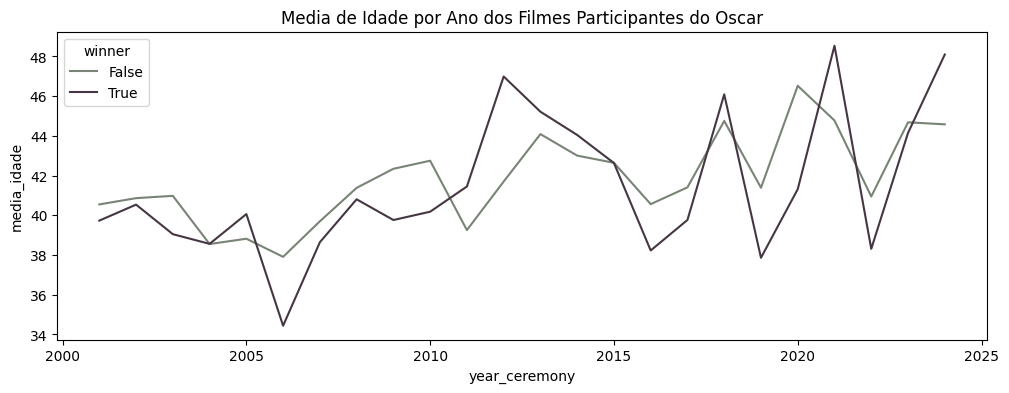

In [6]:
group = df.groupby(['year_ceremony','winner'])['media_idade'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='year_ceremony',y='media_idade',hue='winner',palette=('#788475','#453643'))
plt.title(f'Media de Idade por Ano dos Filmes Participantes do Oscar')
plt.show()

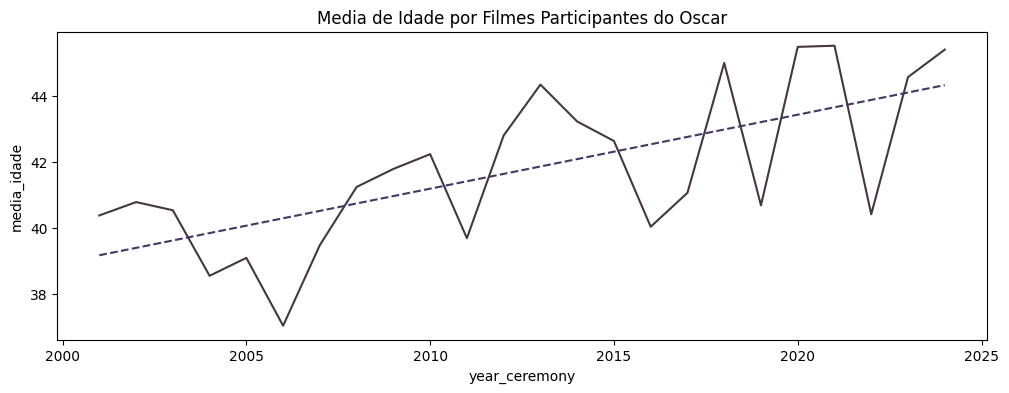

In [7]:
group = df.groupby(['year_ceremony'])['media_idade'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='year_ceremony',y='media_idade',color='#453643')

z = np.polyfit(group['year_ceremony'], group['media_idade'], 1)
p = np.poly1d(z)
plt.plot(group['year_ceremony'], p(group['year_ceremony']), linestyle='--', color='#453663')

plt.title(f'Media de Idade por Filmes Participantes do Oscar')
plt.show()

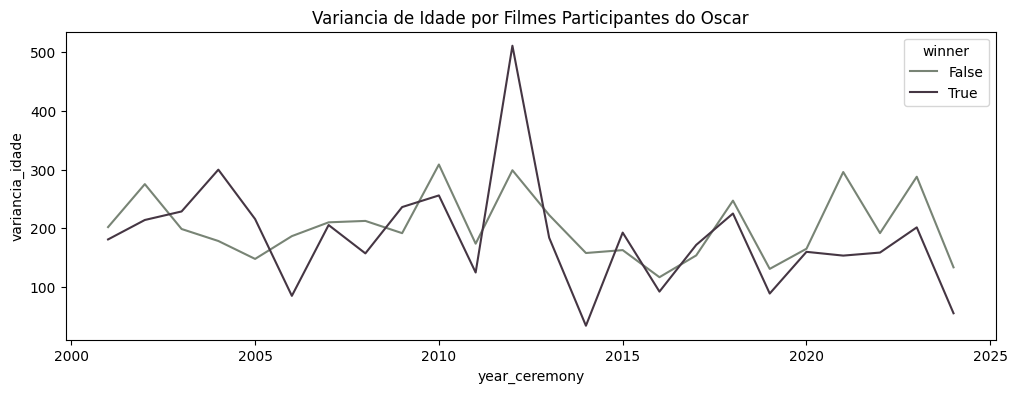

In [8]:
group = df.groupby(['year_ceremony','winner'])['variancia_idade'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='year_ceremony',y='variancia_idade',hue='winner',palette=('#788475','#453643'))
plt.title(f'Variancia de Idade por Filmes Participantes do Oscar')
plt.show()

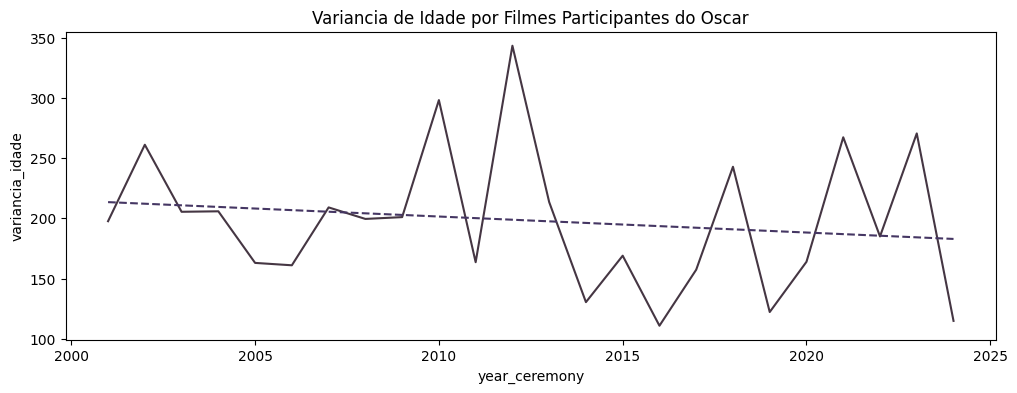

In [9]:
group = df.groupby(['year_ceremony'])['variancia_idade'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='year_ceremony',y='variancia_idade',color='#453643')

z = np.polyfit(group['year_ceremony'], group['variancia_idade'], 1)
p = np.poly1d(z)
plt.plot(group['year_ceremony'], p(group['year_ceremony']), linestyle='--', color='#453663')

plt.title(f'Variancia de Idade por Filmes Participantes do Oscar')
plt.show()

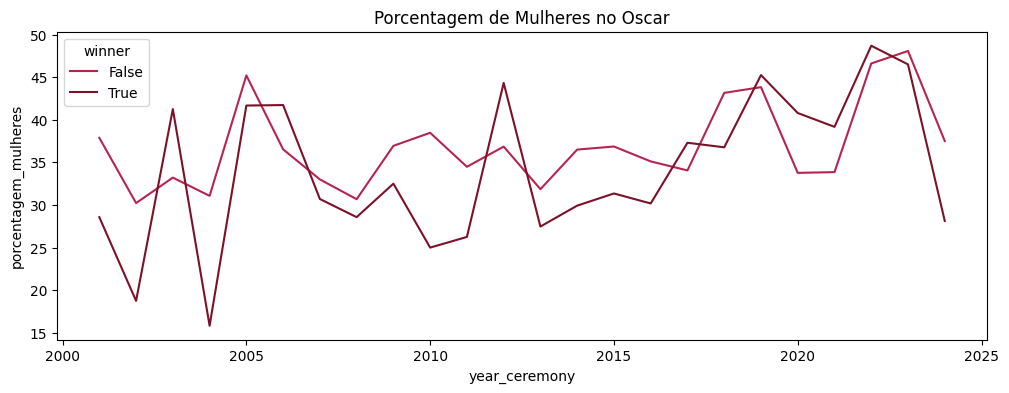

In [10]:
genero = df.groupby(['year_ceremony','winner'])['porcentagem_mulheres'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=genero,x='year_ceremony',y='porcentagem_mulheres',hue='winner',palette=('#B6244F','#7D1128'))
plt.title('Porcentagem de Mulheres no Oscar')
plt.show()

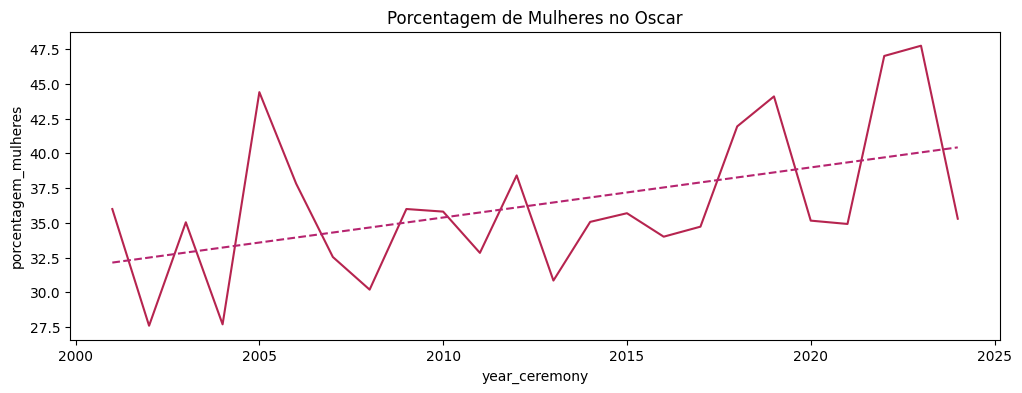

In [11]:
genero = df.groupby(['year_ceremony'])['porcentagem_mulheres'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=genero,x='year_ceremony',y='porcentagem_mulheres',color='#B6244F')

z = np.polyfit(genero['year_ceremony'], genero['porcentagem_mulheres'], 1)
p = np.poly1d(z)
plt.plot(genero['year_ceremony'], p(genero['year_ceremony']), linestyle='--', color='#B6246F')

plt.title('Porcentagem de Mulheres no Oscar') 
plt.show()

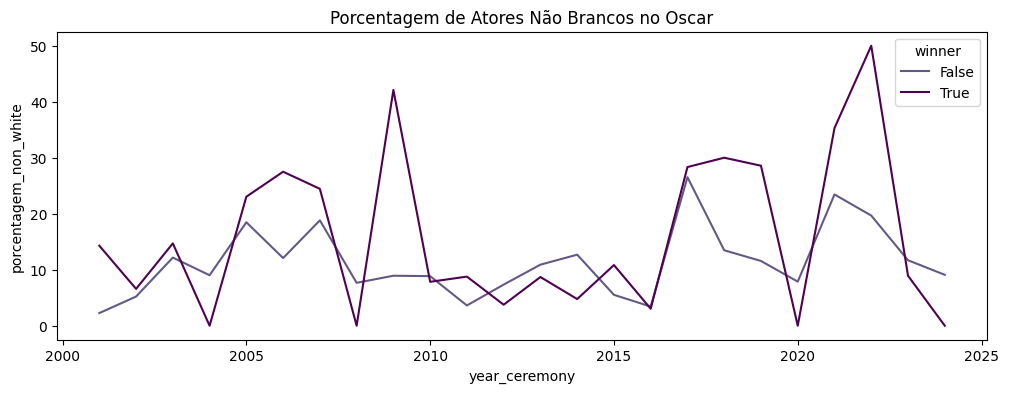

In [12]:
etnia = df.groupby(['year_ceremony','winner'])['porcentagem_non_white'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=etnia,x='year_ceremony',y='porcentagem_non_white',hue='winner',palette=('#645986','#4E0250'))
plt.title('Porcentagem de Atores Não Brancos no Oscar')
plt.show()

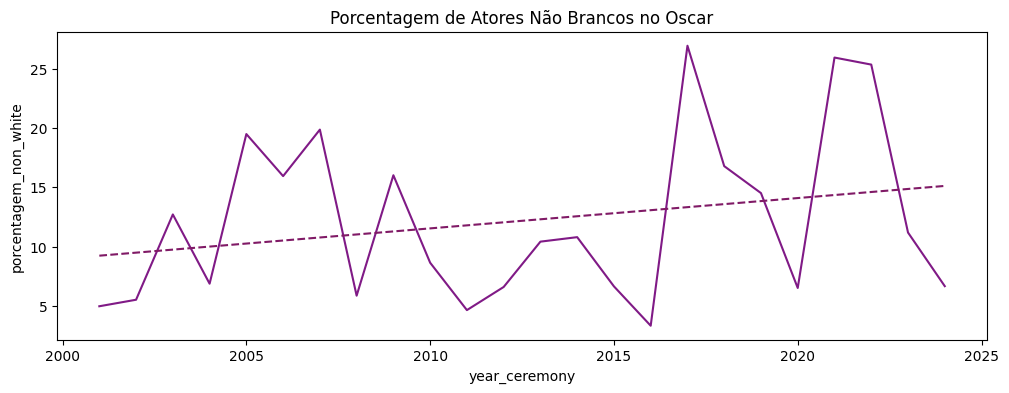

In [13]:
etnia = df.groupby(['year_ceremony'])['porcentagem_non_white'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=etnia,x='year_ceremony',y='porcentagem_non_white',color='#801A86')

z = np.polyfit(etnia['year_ceremony'], etnia['porcentagem_non_white'], 1)
p = np.poly1d(z)
plt.plot(etnia['year_ceremony'], p(etnia['year_ceremony']), linestyle='--', color='#801A66')

plt.title('Porcentagem de Atores Não Brancos no Oscar')
plt.show()

# Comparando Médias

## Idades

Intervalo de Confiança

In [14]:
media_idades = df.groupby('year_ceremony')['media_idade'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(df.groupby(['year_ceremony'])['media_idade'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 41.754407233508154 
 Intervalo: (40.74732020168605, 42.761494265330256)


Como a diferença pode ser 0 e o valor de P é alto, não podemos afirmar que a média da idade entre os indicados e premiados é diferente

In [15]:
df_p = df.groupby(['year_ceremony','winner'])['media_idade'].mean().reset_index()
df_w = df_p[df_p['winner']==True]
df_i = df_p[df_p['winner']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['media_idade']), sms.DescrStatsW(df_i['media_idade'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

## Porcentagem de Mulheres

Intervalo de confiança

In [16]:
media_idades = df.groupby('year_ceremony')['porcentagem_mulheres'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(df.groupby(['year_ceremony'])['porcentagem_mulheres'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 36.283573115940435 
 Intervalo: (34.00296779764572, 38.56417843423515)


Como a diferença pode ser 0 e o valor de P é alto, não podemos afirmar que a média da porcentagem de mulheres entre os indicados e premiados é diferente

In [17]:
df_p = df.groupby(['year_ceremony','winner'])['porcentagem_mulheres'].mean().reset_index()
df_w = df_p[df_p['winner']==True]
df_i = df_p[df_p['winner']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['porcentagem_mulheres']), sms.DescrStatsW(df_i['porcentagem_mulheres'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

## Porcentagem de Não Brancos

Intervalo de confiança

In [18]:
media_idades = df.groupby('year_ceremony')['porcentagem_non_white'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(df.groupby(['year_ceremony'])['porcentagem_non_white'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 12.172418461909098 
 Intervalo: (9.136025697812316, 15.208811226005876)


Como a diferença pode ser 0 e o valor de P é alto, não podemos afirmar que a média da porcentagem de atores não brancos entre os indicados e premiados é diferente

In [19]:
df_p = df.groupby(['year_ceremony','winner'])['porcentagem_non_white'].mean().reset_index()
df_w = df_p[df_p['winner']==True]
df_i = df_p[df_p['winner']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['porcentagem_non_white']), sms.DescrStatsW(df_i['porcentagem_non_white'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

# Relevância

#### A diferença entre indicados e premiados é irrelevante porque apenas um filme indicado não ganhou em nenhuma categoria

In [20]:
df['nulos_etnia'] = df['qtd_atores'] - df['qtd_atores_etnia']
df['nulos_genero'] = df['qtd_atores'] - df['qtd_atores_genero']

In [21]:
media_nulos_etnia = df['nulos_etnia'].mean()
media_nulos_genero = df['nulos_genero'].mean()

print('Media de Nulos Etnia',media_nulos_etnia)
print('Media de Nulos Genero',media_nulos_genero)

Media de Nulos Etnia 1.6211711711711712
Media de Nulos Genero 0.0891891891891892
